In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose as mlr
import matplotlib.pyplot as plt
import numpy as np
import time
import heapq
from itertools import groupby
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from statistics import mean
scaler = MinMaxScaler()
lb = LabelBinarizer()
%matplotlib inline

# Problem 1: Continuous Peaks

In [2]:
t_pcts = [i * 0.1 for i in range(1,10)]

contPeakProblemList = []

for pct in t_pcts:
    contPeakProblemList.append( mlr.DiscreteOpt(length = 100, fitness_fn = mlr.ContinuousPeaks(t_pct=pct), maximize = True ) )
print(len(contPeakProblemList))


9


# Problem 2: Knapsack

In [3]:
knapWeights = [np.random.randint(1,51) for i in range(100)]
knapValues = [np.random.randint(1,51) for i in range(100)]

knapsackProblemList = []

for pct in t_pcts:
    knapsackProblemList.append( mlr.DiscreteOpt(length = 100, fitness_fn = mlr.Knapsack(knapWeights,knapValues,pct), maximize = True ) )

print(len(knapsackProblemList))


9


# Problem 3: Max K Color

In [4]:
kColorEdges = [(np.random.randint(0,50), np.random.randint(0,50)) for i in range(100)]

kColorProblemList = []
kColorProblemList.append( mlr.DiscreteOpt(length = 100, fitness_fn = mlr.MaxKColor(kColorEdges), maximize = True ) )

print(len(kColorProblemList))


1


Discrete Opt Parameters:	


length (int) – Number of elements in state vector.
fitness_fn (fitness function object) – Object to implement fitness function for optimization.
maximize (bool, default: True) – Whether to maximize the fitness function. Set False for minimization problem.
max_val (int, default: 2) – Number of unique values that each element in the state vector can take. Assumes values are integers in the range 0 to (max_val - 1), inclusive.

# Randomized Hill Climbing

In [66]:
max_iters = [100, 500, 1000, 5000]
max_attempts = [0, 5,10,20]
restarts = [1, 5, 10, 20]

cPeaksResultsRHC = []
start = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for restart in restarts:
            for problem in contPeakProblemList:
                cPeaksResultsRHC.append([mlr.random_hill_climb(problem, max_attempts=attempts, max_iters=iters, restarts=restart, curve=True), attempts,iters, restart, problem])
end = time.time()
print(end - start)

12.136960744857788


# Random Hill Climb Analysis

## Continuous Peaks

In [67]:
groupedContPeakRHC = [list(g) for k,g in groupby(sorted(cPeaksResultsRHC,key=lambda i: i[4].fitness_fn.t_pct), lambda i: i[4].fitness_fn.t_pct)]


2.1
[11.1875, 11.171875, 11.609375, 11.28125, 10.75, 11.421875, 10.90625, 11.265625, 10.796875]
Score: 28.0 Attempts: 20 Iterations: 500 Restarts: 10
Score: 21.0 Attempts: 20 Iterations: 500 Restarts: 20
Score: 18.0 Attempts: 20 Iterations: 100 Restarts: 20


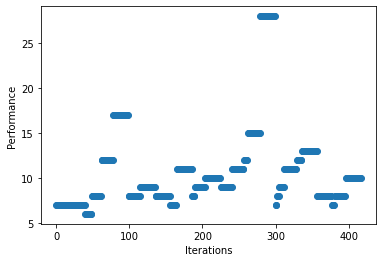

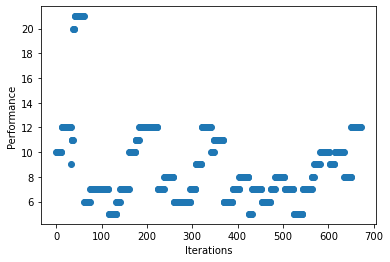

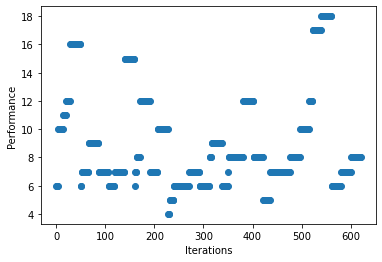

In [68]:
# print(cPeaksResultsRHC[0])

bestCPeaksRHC = []
meanCPeaksRHCScore = []
maxIndexCPRHC = 0
maxScoreCPRHC = np.NINF
for index, group in enumerate(groupedContPeakRHC):
    top3 = heapq.nlargest(3, group, lambda e: e[0][1] )
    bestCPeaksRHC.append(top3)
    if(top3[0][0][1] > maxScoreCPRHC):
        maxScoreCPRHC = top3[0][0][1]
        maxIndexCPRHC = index
        
    meanCPeaksRHCScore.append( np.mean([item[0][1] for item in group]) )

print(maxIndexCPRHC + 1 * 0.1)
print(meanCPeaksRHCScore)
for item in bestCPeaksRHC[maxIndexCPRHC]:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Restarts:', item[3])
# print(bestCPeaksRHC)

# print(bestCPeaksRHC[maxIndexCPRHC])


for res in bestCPeaksRHC[maxIndexCPRHC]:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()
# plt.scatter(cPeaksResultsRHC[0][0][2],range(0,len(cPeaksResultsRHC[0][0][2]) ) )
# plt.show()

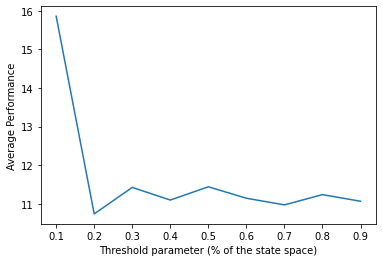

In [8]:
plt.plot(t_pcts, meanCPeaksRHCScore)
plt.xlabel("Threshold parameter (% of the state space)")
plt.ylabel('Average Performance')
plt.show()

## Knapsack

In [69]:
max_iters = [100, 500, 1000, 5000]
max_attempts = [0, 5,10,20]
restarts = [1, 5, 10, 20]

knapsackResultsRHC = []
startKPRHC = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for restart in restarts:
            for problem in knapsackProblemList:
                knapsackResultsRHC.append([mlr.random_hill_climb(problem, max_attempts=attempts, max_iters=iters, restarts=restart, curve=True), attempts,iters, restart, problem])
endKPRHC = time.time()
print(endKPRHC - startKPRHC)


21.138864517211914


In [70]:
groupedKnapRHC  = [list(g) for k,g in groupby(sorted(knapsackResultsRHC,key=lambda i: i[4].fitness_fn._w), lambda i: i[4].fitness_fn._w)]


In [71]:

bestKnapRHC = []
meanKnapRHCScore = []
maxIndexKnapRHC = 0
maxScoreKnapRHC = np.NINF
for index, group in enumerate(groupedKnapRHC):
    top3 = heapq.nlargest(3, group, lambda e: e[0][1] )
    bestKnapRHC.append(top3)
    if(top3[0][0][1] > maxScoreKnapRHC):
        maxScoreKnapRHC = top3[0][0][1]
        maxIndexKnapRHC = index
        
    meanKnapRHCScore.append( np.mean([item[0][1] for item in group]) )

print(maxIndexKnapRHC + 1 * 0.1)
print(meanKnapRHCScore)
for item in bestKnapRHC[maxIndexKnapRHC]:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Restarts:', item[3])



8.1
[0.0, 0.0, 0.0, 395.8125, 1268.9375, 1493.34375, 1637.5625, 1723.8125, 1808.296875]
Score: 2258.0 Attempts: 20 Iterations: 1000 Restarts: 1
Score: 2235.0 Attempts: 20 Iterations: 1000 Restarts: 20
Score: 2226.0 Attempts: 20 Iterations: 500 Restarts: 20


In [12]:
print(len(groupedKnapRHC))

9


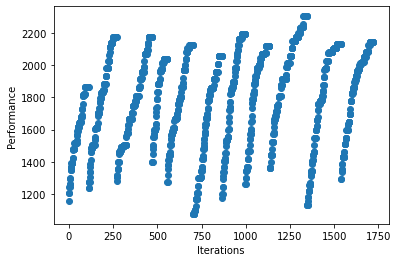

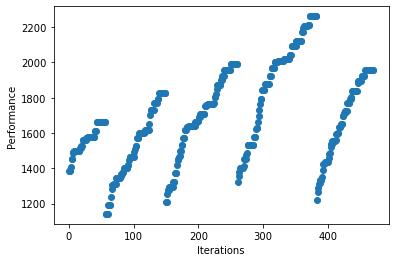

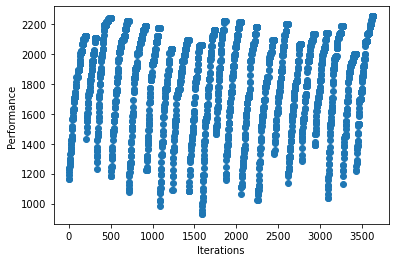

In [13]:

for res in bestKnapRHC[maxIndexKnapRHC]:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

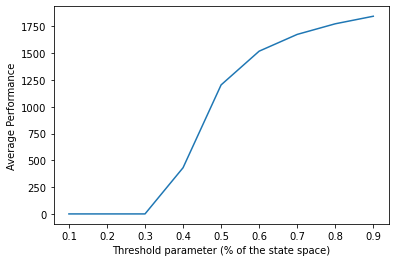

In [14]:
plt.plot(t_pcts, meanKnapRHCScore)
plt.xlabel("Threshold parameter (% of the state space)")
plt.ylabel('Average Performance')
plt.show()

## K Color

In [72]:
max_iters = [100, 500, 1000, 5000]
max_attempts = [0, 5,10,20]
restarts = [1, 5, 10, 20]

kColorResultsRHC = []
startKCRHC = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for restart in restarts:
            for problem in kColorProblemList:
                kColorResultsRHC.append([mlr.random_hill_climb(problem, max_attempts=attempts, max_iters=iters, restarts=restart, curve=True), attempts,iters, restart, problem])
endKCRHC = time.time()
print(endKCRHC - startKCRHC)

2.5762948989868164


Score: 85.0 Attempts: 20 Iterations: 500 Restarts: 20
Score: 84.0 Attempts: 20 Iterations: 100 Restarts: 20
Score: 84.0 Attempts: 20 Iterations: 1000 Restarts: 10


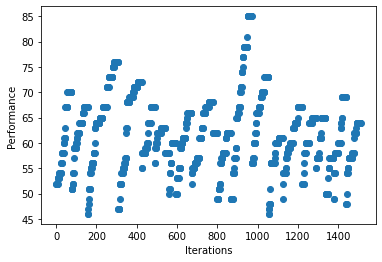

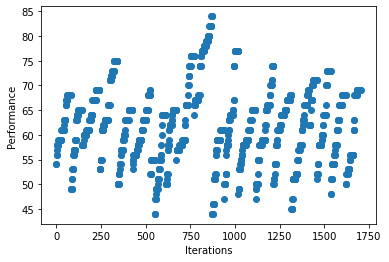

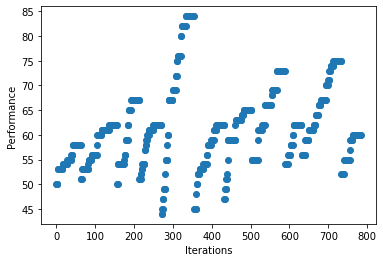

In [73]:
top3KCRHC = heapq.nlargest(3, kColorResultsRHC, lambda e: e[0][1] )

for item in top3KCRHC:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Restarts:', item[3])


for res in top3KCRHC:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

# Simulated Annealing

In [74]:
geomDecays = [mlr.GeomDecay(decay=d) for d in [0.11, 0.33, 0.66, 0.99]]
arithDecays = [mlr.ArithDecay(decay=d) for d in [0.003, 0.001, 0.0003, 0.0001]]
expDecays = [mlr.ExpDecay(exp_const=d) for d in [0.0003, 0.001, 0.003, 0.005]]
decays = [geomDecays, arithDecays, expDecays]

In [75]:
max_iters = [100, 500, 1000, 5000]
max_attempts = [0, 5,10,20]
restarts = [1, 5, 10, 20]

cPeaksResultsSA = []
start = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for decay in decays:
            for d in decay:
                for problem in contPeakProblemList:
                    cPeaksResultsSA.append([mlr.simulated_annealing(problem, max_attempts=attempts, max_iters=iters, curve=True, schedule=d), attempts,iters, decay, problem])
end = time.time()
print(end - start)

323.58175134658813


In [76]:
groupedContPeakSA = [list(g) for k,g in groupby(sorted(cPeaksResultsSA,key=lambda i: i[4].fitness_fn.t_pct), lambda i: i[4].fitness_fn.t_pct)]

In [ ]:
bestCPeaksSA = []
meanCPeaksSAScore = []
maxIndexCPSA = 0
maxScoreCPSA = np.NINF
for index, group in enumerate(groupedContPeakSA):
    top3 = heapq.nlargest(3, group, lambda e: e[0][1] )
    bestCPeaksSA.append(top3)
    if(top3[0][0][1] > maxScoreCPSA):
        maxScoreCPSA = top3[0][0][1]
        maxIndexCPSA = index
        
    meanCPeaksSAScore.append( np.mean([item[0][1] for item in group]) )


print(meanCPeaksSAScore)
for item in bestCPeaksSA[maxIndexCPSA]:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Schedule:', item[3])


for res in bestCPeaksSA[maxIndexCPSA]:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

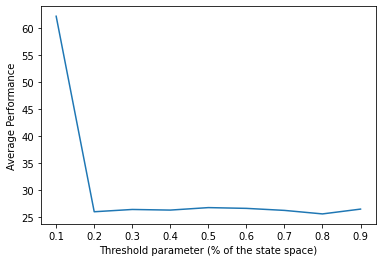

In [78]:
plt.plot(t_pcts, meanCPeaksSAScore)
plt.xlabel("Threshold parameter (% of the state space)")
plt.ylabel('Average Performance')
plt.show()

## Knapsack

In [79]:
knapsackResultsSA = []
max_iters = [100, 500, 1000, 5000]
max_attempts = [0, 5,10,20]

start = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for decayType in decays:
            for decay in decayType:
                for problem in knapsackProblemList:
                    knapsackResultsSA.append([mlr.simulated_annealing(problem, max_attempts=attempts, max_iters=iters, schedule=decay, curve=True), attempts,iters, decay, problem])
end = time.time()
print(end - start)

156.78426456451416


In [80]:
groupedKnapSA  = [list(g) for k,g in groupby(sorted(knapsackResultsSA,key=lambda i: i[4].fitness_fn._w), lambda i: i[4].fitness_fn._w)]


In [ ]:

bestKnapSA = []
meanKnapSAScore = []
maxIndexKnapSA = 0
maxScoreKnapSA = np.NINF
for index, group in enumerate(groupedKnapSA):
    top3 = heapq.nlargest(3, group, lambda e: e[0][1] )
    bestKnapSA.append(top3)
    if(top3[0][0][1] > maxScoreKnapSA):
        maxScoreKnapSA = top3[0][0][1]
        maxIndexKnapSA = index
        
    meanKnapSAScore.append( np.mean([item[0][1] for item in group]) )

print(meanKnapSAScore)
for item in bestKnapSA[maxIndexKnapSA]:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Schedule:', item[3])



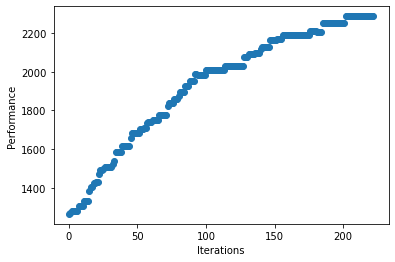

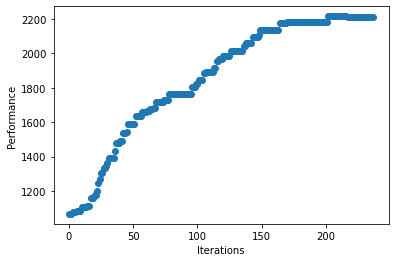

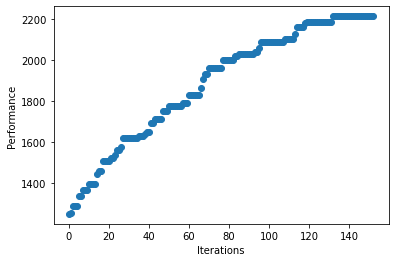

In [82]:
for res in bestKnapSA[maxIndexKnapSA]:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

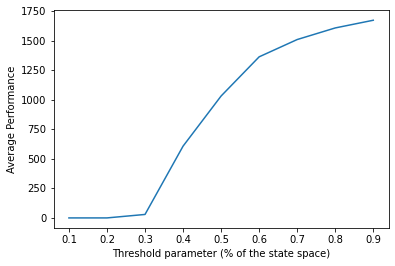

In [26]:
plt.plot(t_pcts, meanKnapSAScore)
plt.xlabel("Threshold parameter (% of the state space)")
plt.ylabel('Average Performance')
plt.show()

## K Color

In [83]:
max_iters = [100, 500, 1000, 5000]
max_attempts = [0, 5,10,20]
restarts = [1, 5, 10, 20]

kColorResultsSA = []
startKCSA = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for decayType in decays:
            for decay in decayType:
                for problem in kColorProblemList:
                    kColorResultsSA.append([mlr.simulated_annealing(problem, max_attempts=attempts, max_iters=iters, schedule=decay, curve=True), attempts,iters, decay, problem])
endKCSA = time.time()
print(endKCSA - startKCSA)

28.230969667434692


Score: 97.0 Attempts: 10 Iterations: 500 Schedule: <mlrose.decay.GeomDecay object at 0x000001C2AAE11BB0>
Score: 97.0 Attempts: 20 Iterations: 500 Schedule: <mlrose.decay.GeomDecay object at 0x000001C2AAE11E20>
Score: 97.0 Attempts: 20 Iterations: 500 Schedule: <mlrose.decay.ExpDecay object at 0x000001C29CED09D0>


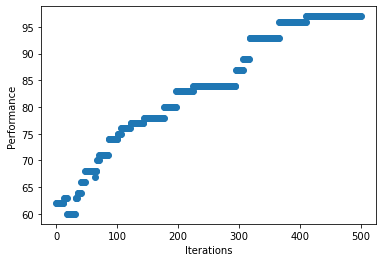

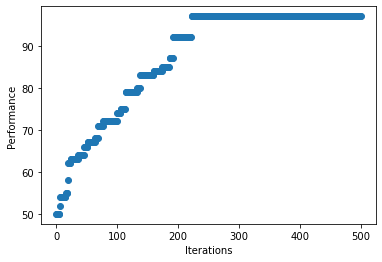

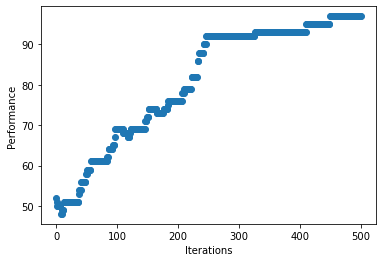

In [84]:
top3KCSA = heapq.nlargest(3, kColorResultsSA, lambda e: e[0][1] )

for item in top3KCSA:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Schedule:', item[3])


for res in top3KCSA:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

# Genetic Algorithms

In [5]:
pop_sizes = [50, 100, 200, 500]
mutation_probs = [0.05, 0.1, 0.25, 0.333]

In [6]:
max_iters = [100, 500, 1000, np.inf]
max_attempts = [0, 5,10,20]
restarts = [1, 5, 10, 20]

cPeaksResultsGA = []
start = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for pop_size in pop_sizes:
            for mut in mutation_probs:
                for problem in contPeakProblemList:
                    cPeaksResultsGA.append([mlr.genetic_alg(problem, max_attempts=attempts, max_iters=iters, pop_size=pop_size, mutation_prob=mut, curve=True), attempts, iters, pop_size, mut, problem])
end = time.time()
print(end - start)

1531.4038848876953


In [7]:
groupedContPeakGA = [list(g) for k,g in groupby(sorted(cPeaksResultsGA,key=lambda i: i[5].fitness_fn.t_pct), lambda i: i[5].fitness_fn.t_pct)]

0.1
[72.73046875, 16.51171875, 16.3984375, 16.52734375, 16.375, 16.4453125, 16.37890625, 16.1171875, 15.984375]
Score: 134.0 Attempts: 10 Iterations: 1000 Pop Size: 200 Mutation Prob 0.05
Score: 133.0 Attempts: 20 Iterations: 1000 Pop Size: 500 Mutation Prob 0.05
Score: 130.0 Attempts: 10 Iterations: 100 Pop Size: 500 Mutation Prob 0.1


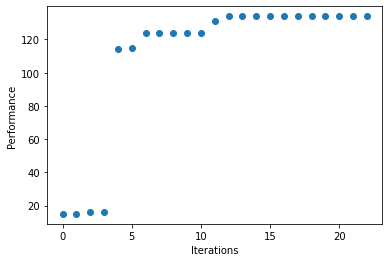

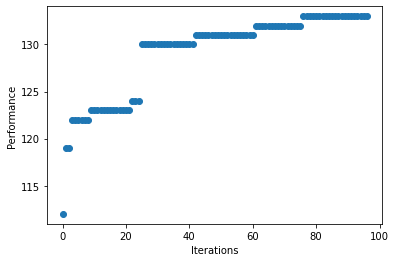

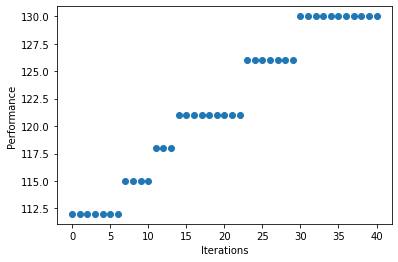

In [8]:
bestCPeaksGA = []
meanCPeaksGAScore = []
maxIndexCPGA = 0
maxScoreCPGA = np.NINF
for index, group in enumerate(groupedContPeakGA):
    top3 = heapq.nlargest(3, group, lambda e: e[0][1] )
    bestCPeaksGA.append(top3)
    if(top3[0][0][1] > maxScoreCPGA):
        maxScoreCPGA = top3[0][0][1]
        maxIndexCPGA = index
        
    meanCPeaksGAScore.append( np.mean([item[0][1] for item in group]) )

print(maxIndexCPGA + 1 * 0.1)
print(meanCPeaksGAScore)
for item in bestCPeaksGA[maxIndexCPGA]:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Pop Size:', item[3], 'Mutation Prob', item[4])


for res in bestCPeaksGA[maxIndexCPGA]:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

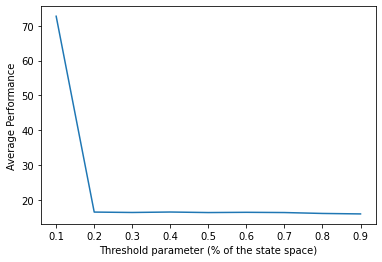

In [9]:
plt.plot(t_pcts, meanCPeaksGAScore)
plt.xlabel("Threshold parameter (% of the state space)")
plt.ylabel('Average Performance')
plt.show()

In [10]:
knapsackResultsGA = []
max_iters = [100, 500, 1000, np.inf]
max_attempts = [0, 5,10,20]


start = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for pop_size in pop_sizes:
            for mut in mutation_probs:
                for problem in knapsackProblemList:
                    knapsackResultsGA.append([mlr.genetic_alg(problem, max_attempts=attempts, max_iters=iters, pop_size=pop_size, mutation_prob=mut, curve=True), attempts, iters, pop_size, mut, problem])

end = time.time()
print(end - start)

1192.3810575008392


In [11]:
groupedKnapGA  = [list(g) for k,g in groupby(sorted(knapsackResultsGA,key=lambda i: i[5].fitness_fn._w), lambda i: i[5].fitness_fn._w)]

In [ ]:
bestKnapGA = []
meanKnapGAScore = []
maxIndexKnapGA = 0
maxScoreKnapGA = np.NINF
for index, group in enumerate(groupedKnapGA):
    top3 = heapq.nlargest(3, group, lambda e: e[0][1] )
    bestKnapGA.append(top3)
    if(top3[0][0][1] > maxScoreKnapGA):
        maxScoreKnapGA = top3[0][0][1]
        maxIndexKnapGA = index
        
    meanKnapGAScore.append( np.mean([item[0][1] for item in group]) )

print(meanKnapGAScore)
for item in bestKnapGA[maxIndexKnapGA]:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Pop Size:', item[3], 'Mutation Prob', item[4])



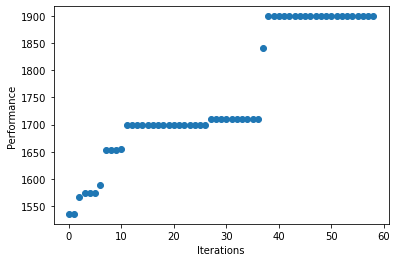

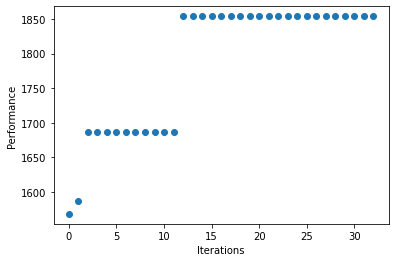

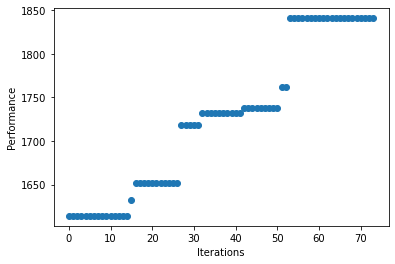

In [13]:
for res in bestKnapGA[maxIndexKnapGA]:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

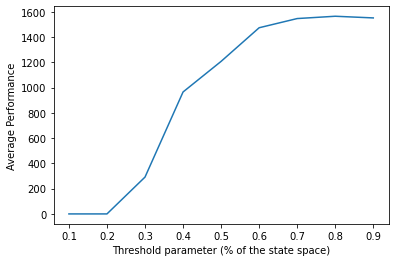

In [14]:
plt.plot(t_pcts, meanKnapGAScore)
plt.xlabel("Threshold parameter (% of the state space)")
plt.ylabel('Average Performance')
plt.show()

In [15]:
max_iters = [100, 500, 1000, np.inf]
max_attempts = [5,10,100,500]
restarts = [1, 5, 10, 20]

kColorResultsGA = []
startKCGA = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for p in pop_sizes:
            for mp in mutation_probs:
                for problem in kColorProblemList:
                    kColorResultsGA.append([mlr.genetic_alg(problem, max_attempts=attempts, max_iters=iters, curve=True, pop_size=p, mutation_prob=mp), attempts, iters, pop_size, mut, problem])
endKCSA = time.time()
print(endKCSA - startKCGA)

1812.687715291977


Score: 83.0 Attempts: 100 Iterations: 1000 Pop Size: 500 Mutation Prob 0.333
Score: 82.0 Attempts: 500 Iterations: 500 Pop Size: 500 Mutation Prob 0.333
Score: 80.0 Attempts: 500 Iterations: 500 Pop Size: 500 Mutation Prob 0.333


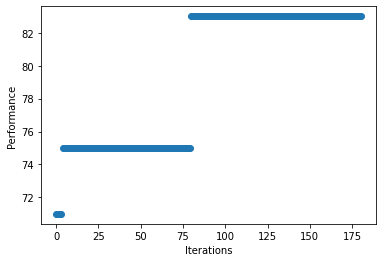

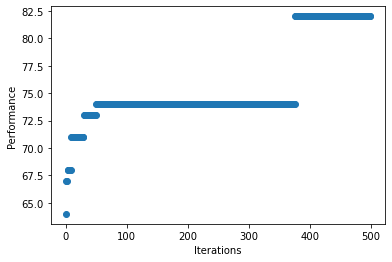

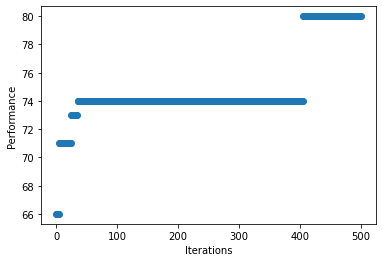

In [29]:
top3KCGA = heapq.nlargest(3, kColorResultsGA, lambda e: e[0][1] )

for item in top3KCGA:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Pop Size:', item[3], 'Mutation Prob', item[4])


for res in top3KCGA:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

# MIMIC

In [28]:
max_iters = [100, 500, 1000, np.inf]
max_attempts = [0, 5,10,20]
pop_sizes = [5, 10, 25, 50]
keep_pcts = [0.1, 0.2, 0.5]

cPeaksResultsMM = []
start = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for pop_size in pop_sizes:
            for keep_pct  in keep_pcts:
                for problem in contPeakProblemList:
                    cPeaksResultsMM.append([mlr.mimic(problem, max_attempts=attempts, max_iters=iters, pop_size=pop_size, keep_pct=keep_pct, fast_mimic=True, curve=True), attempts, iters,  pop_size, keep_pct, problem])
end = time.time()
print(end - start)

1129.6868433952332


In [39]:
groupedContPeakMM = [list(g) for k,g in groupby(sorted(cPeaksResultsMM,key=lambda i: i[5].fitness_fn.t_pct), lambda i: i[5].fitness_fn.t_pct)]

0.1
[36.171875, 13.208333333333334, 12.802083333333334, 12.791666666666666, 13.21875, 12.848958333333334, 12.692708333333334, 12.463541666666666, 13.041666666666666]
Score: 130.0 Attempts: 5 Iterations: 100 Population Size: 50 Keep Pct: 0.2
Score: 130.0 Attempts: 10 Iterations: inf Population Size: 50 Keep Pct: 0.2
Score: 127.0 Attempts: 5 Iterations: 500 Population Size: 50 Keep Pct: 0.1


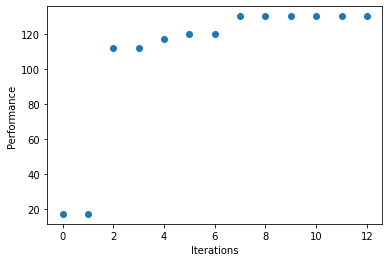

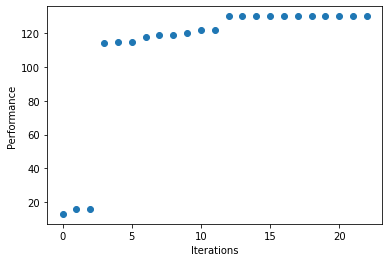

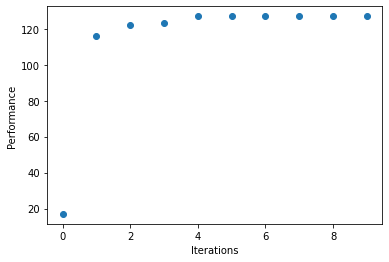

In [40]:
bestCPeaksMM = []
meanCPeaksMMScore = []
maxIndexCPMM = 0
maxScoreCPMM = np.NINF
for index, group in enumerate(groupedContPeakMM):
    top3 = heapq.nlargest(3, group, lambda e: e[0][1] )
    bestCPeaksMM.append(top3)
    if(top3[0][0][1] > maxScoreCPMM):
        maxScoreCPMM = top3[0][0][1]
        maxIndexCPMM = index
        
    meanCPeaksMMScore.append( np.mean([item[0][1] for item in group]) )

print(maxIndexCPMM + 1 * 0.1)
print(meanCPeaksMMScore)
for item in bestCPeaksMM[maxIndexCPMM]:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Population Size:', item[3], 'Keep Pct:', item[4])


for res in bestCPeaksMM[maxIndexCPMM]:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

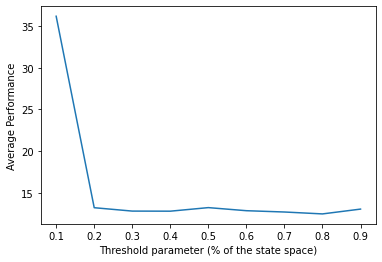

In [41]:
plt.plot(t_pcts, meanCPeaksMMScore)
plt.xlabel("Threshold parameter (% of the state space)")
plt.ylabel('Average Performance')
plt.show()

In [42]:
knapsackResultsMM = []
max_iters = [100, 500, 1000, np.inf]
max_attempts = [0, 5,10,20]
pop_sizes = [5, 10, 25, 50]
keep_pcts = [0.1, 0.2, 0.5]

start = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for pop_size in pop_sizes:
            for keep_pct  in keep_pcts:
                for problem in knapsackProblemList:
                    knapsackResultsMM.append([mlr.mimic(problem, max_attempts=attempts, max_iters=iters, pop_size=pop_size, keep_pct=keep_pct, fast_mimic=True, curve=True), attempts, iters,  pop_size, keep_pct, problem])
end = time.time()
print(end - start)

894.7022318840027


In [43]:
groupedKnapMM  = [list(g) for k,g in groupby(sorted(knapsackResultsMM,key=lambda i: i[5].fitness_fn._w), lambda i: i[5].fitness_fn._w)]

In [ ]:
bestKnapMM = []
meanKnapMMScore = []
maxIndexKnapMM = 0
maxScoreKnapMM = np.NINF
for index, group in enumerate(groupedKnapMM):
    top3 = heapq.nlargest(3, group, lambda e: e[0][1] )
    bestKnapMM.append(top3)
    if(top3[0][0][1] > maxScoreKnapMM):
        maxScoreKnapMM = top3[0][0][1]
        maxIndexKnapMM = index
        
    meanKnapMMScore.append( np.mean([item[0][1] for item in group]) )

print(meanKnapMMScore)
for item in bestKnapMM[maxIndexKnapMM]:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Population Size:', item[3], 'Keep Pct:', item[4])



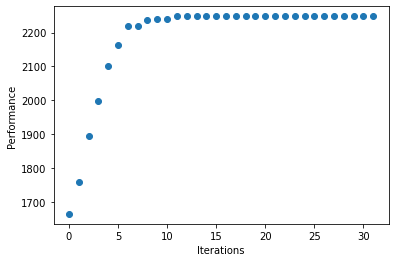

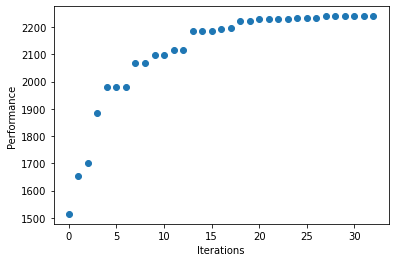

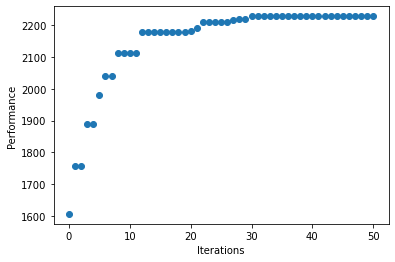

In [45]:
for res in bestKnapMM[maxIndexKnapGA]:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

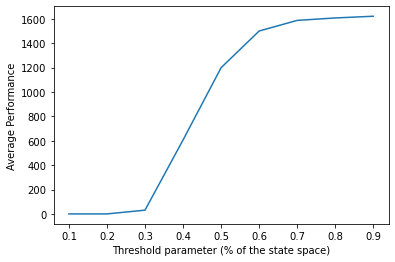

In [46]:
plt.plot(t_pcts, meanKnapMMScore)
plt.xlabel("Threshold parameter (% of the state space)")
plt.ylabel('Average Performance')
plt.show()

In [47]:
max_iters = [100, 500, 1000, np.inf]
max_attempts = [0, 5,10,20]


start = time.time()
kColorResultsMM = []
startKCMM = time.time()
for iters in max_iters:
    for attempts in max_attempts:
        for pop_size in pop_sizes:
            for keep_pct  in keep_pcts:
                for problem in kColorProblemList:
                    kColorResultsMM.append([mlr.mimic(problem, max_attempts=attempts, max_iters=iters, pop_size=pop_size, keep_pct=keep_pct, fast_mimic=True, curve=True), attempts, iters,  pop_size, keep_pct, problem])
endKCSA = time.time()
print(endKCSA - startKCMM)

86.3730137348175


Score: 90.0 Attempts: 10 Iterations: inf Population Size: 50 Keep Pct: 0.2
Score: 89.0 Attempts: 5 Iterations: 500 Population Size: 50 Keep Pct: 0.2
Score: 86.0 Attempts: 5 Iterations: 1000 Population Size: 50 Keep Pct: 0.2


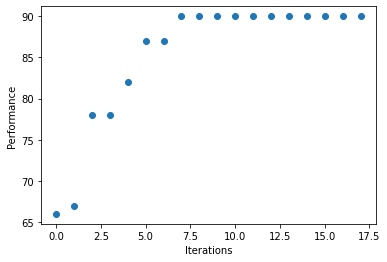

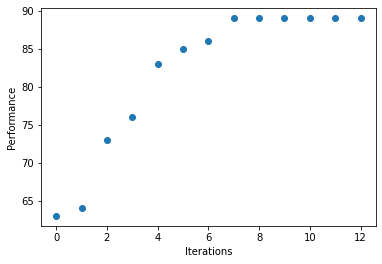

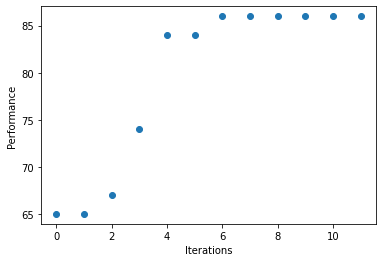

In [48]:
top3KCMM = heapq.nlargest(3, kColorResultsMM, lambda e: e[0][1] )

for item in top3KCMM:
    print('Score:', item[0][1], 'Attempts:', item[1], 'Iterations:', item[2], 'Population Size:', item[3], 'Keep Pct:', item[4])


for res in top3KCMM:
    plt.scatter(range(0, len(res[0][2])  ), res[0][2])
    plt.xlabel('Iterations')
    plt.ylabel('Performance')
    plt.show()

# Part 2

In [72]:
# Load data
df= pd.read_csv('./spotifydata/data.csv')
df.set_index('id', inplace=True)
filtered_df = df.copy()
filtered_df['year'] = filtered_df['year'].apply(lambda year: 0 if year < 2000 else 1)
filtered_df = filtered_df.drop(['name', 'artists', 'release_date'], axis=1)
# Feature scaling
filtered_scaled_df = filtered_df.copy()
filtered_scaled_df[['duration_ms', 'popularity', 'tempo', 'loudness']] = scaler.fit_transform(filtered_scaled_df[['duration_ms', 'popularity', 'tempo', 'loudness']])

# One hot encoding
encoded_df = pd.DataFrame( lb.fit_transform(filtered_scaled_df['key']) )
filtered_scaled_df = filtered_scaled_df.reset_index()
filtered_scaled_df = pd.concat([filtered_scaled_df,  encoded_df], axis=1)
filtered_scaled_df = filtered_scaled_df.drop(['key'], axis=1)
filtered_scaled_df.set_index('id', inplace=True)

X = filtered_scaled_df.loc[:, filtered_scaled_df.columns != 'year']
Y = filtered_scaled_df['year']

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.4)

In [ ]:
# clf = MLPClassifier(hidden_layer_sizes=(150,100,50),activation = 'logistic',solver='adam',random_state=1)

In [94]:
print(len(Y_train))

104633


## Random Hill Climb

RHCNNResults = []
nnModelRHC = mlr.NeuralNetwork(restarts= 0, hidden_nodes = [150,100,50], activation = 'sigmoid', \
                                algorithm = 'random_hill_climb', \
                                bias = True, is_classifier = True, learning_rate = 0.0001, \
                                early_stopping = True, clip_max = 5, max_attempts = 10, \
                                random_state = 1, curve=True)
print('Begin Train')
nnModelRHC.fit(X_train,Y_train)
print('End Train')
                                 



In [13]:
print(nnModelRHC)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[150, 100, 50],
              learning_rate=0.0001)


In [105]:
## Simulated Annealing

Begin Train
End Train


In [9]:
SANNResults = []

nnModelSA=  mlr.NeuralNetwork(hidden_nodes = [150,100,50], activation = 'sigmoid', \
                                algorithm = 'simulated_annealing', \
                                bias = True, is_classifier = True, learning_rate = 0.0001, \
                                early_stopping = True, clip_max = 5, \
                                random_state = 1, curve=True)
print('Begin Train')
nnModelSA.fit(X_train,Y_train)
print('End Train')


Begin Train
End Train


## Genetic Algorithm

In [12]:
nnModelGA =  mlr.NeuralNetwork(hidden_nodes = [150,100,50], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, \
                                 random_state = 1, curve=True)
print('Begin Train')                         
nnModelGA.fit(X_train,Y_train)
print('End Train')

Begin Train
End Train


In [55]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

        """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring='accuracy'
                       )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Testing score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

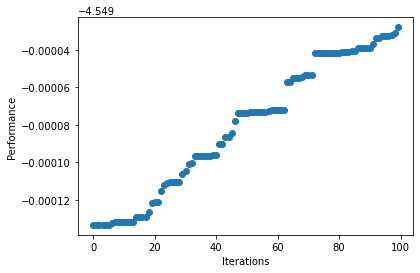

In [108]:

plt.scatter(range(0, len(nnModelRHC.fitness_curve)  ), nnModelRHC.fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Performance')
plt.show()

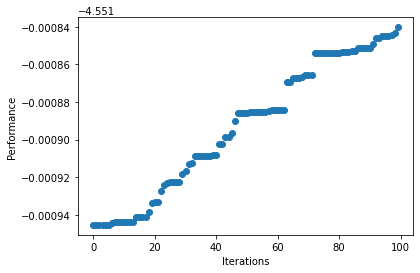

In [16]:
plt.scatter(range(0, len(nnModelSA.fitness_curve)  ), nnModelRHC.fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Performance')
plt.show()

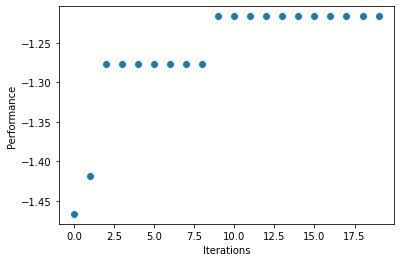

In [18]:
plt.scatter(range(0, len(nnModelGA.fitness_curve)  ), nnModelGA.fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Performance')
plt.show()

In [109]:
print("RMS: %r " % np.sqrt(np.mean(([item for sublist in nnModelRHC.predict(X_test) for item in sublist] - Y_test) ** 2)))
print("RMS: %r " % np.sqrt(np.mean(([item for sublist in nnModelSA.predict(X_test) for item in sublist] - Y_test) ** 2)))
print("RMS: %r " % np.sqrt(np.mean(([item for sublist in nnModelGA.predict(X_test) for item in sublist] - Y_test) ** 2)))

print("Bias: %r " % get_bias([item for sublist in nnModelRHC.predict(X_test) for item in sublist],Y_test))
print("Bias: %r " % get_bias([item for sublist in nnModelSA.predict(X_test) for item in sublist],Y_test))
print("Bias: %r " % get_bias([item for sublist in nnModelGA.predict(X_test) for item in sublist],Y_test))

print("Variance: %r " % get_variance([item for sublist in nnModelRHC.predict(X_test) for item in sublist]))
print("Variance: %r " % get_variance([item for sublist in nnModelSA.predict(X_test) for item in sublist]))
print("Variance: %r " % get_variance([item for sublist in nnModelGA.predict(X_test) for item in sublist]))
# print([item for sublist in nnModelRHC.predict(X_test) for item in sublist])


RMS: 0.86982435860199 
RMS: 0.86982435860199 
RMS: 0.5630956111000103 
Bias: 0.7565944148173633 
Bias: 0.7565944148173633 
Bias: 0.31707666724009403 
Variance: 0.0 
Variance: 0.0 
Variance: 0.14786516443195222 


In [103]:
print("Variance: %r " % get_variance(Y_train))


Variance: 0.1837847628010746 


In [59]:
print([item for sublist in nnModelSA.predict(X_test) for item in sublist])

, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
from mlxtend.evaluate import bias_variance_decomp

In [100]:
def get_bias(predicted_values, true_values):
    return np.mean((predicted_values - true_values) ** 2)
def get_variance(values):
    return np.var(values)
